# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 20

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [6]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 2

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [7]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
96,Pope,Burnley,54,17.924528,95,83.514033,5.3,4.659204,4.487195,4.742549,2.005002
12,Martínez,Aston Villa,51,17.884615,93,77.757341,5.2,4.347722,3.329433,4.384656,1.925204
431,Fabianski,West Ham,51,19.047619,80,80.245632,4.2,4.212896,3.894730,4.120361,1.865502
383,Lloris,Tottenham,56,18.837209,81,81.430020,4.3,4.322828,4.143491,4.244130,1.826728
516,Areola,Fulham,45,17.894737,68,67.474942,3.8,3.770659,3.791188,4.010893,1.777505
8,Leno,Arsenal,50,20.000000,82,79.204603,4.1,3.960230,4.423633,3.741548,1.771069
252,Alisson,Liverpool,59,16.829268,69,70.854654,4.1,4.210204,4.710497,4.089549,1.733314
217,Schmeichel,Leicester City,55,20.000000,82,80.364717,4.1,4.018236,4.740776,3.848016,1.713382
597,Sánchez,Brighton,44,8.888889,32,31.776387,3.6,3.574844,3.574147,3.535774,1.704240


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
39,Hause,Aston Villa,44,4.000000,28,21.108309,7.0,5.277077,3.586388,5.126121,2.515748
5,Cédric,Arsenal,46,3.000000,15,15.079433,5.0,5.026478,7.231681,4.784970,2.343607
273,Stones,Manchester City,52,11.000000,77,56.904768,7.0,5.173161,5.445642,5.119284,2.268581
277,Cancelo,Manchester City,59,15.087719,86,81.284885,5.7,5.387487,5.785390,5.322396,2.217993
75,Bernardo,Brighton,39,2.941176,5,11.296599,1.7,3.840844,3.936799,3.790791,1.944887
558,Coufal,West Ham,47,15.853659,65,65.775022,4.1,4.148886,4.766865,4.051353,1.913738
556,Dias,Manchester City,59,16.938776,83,78.519813,4.9,4.635507,5.944705,4.585825,1.908408
109,Rüdiger,Chelsea,45,5.000000,24,20.129116,4.8,4.025823,4.038451,4.382458,1.897791
470,Kilman,Wolves,40,11.025641,43,41.050007,3.9,3.723140,2.594568,3.842649,1.861570


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
272,De Bruyne,Manchester City,119,16.964286,95,117.614519,5.6,6.933066,7.178408,6.743065,2.009796
37,Grealish,Aston Villa,77,17.936508,113,99.641378,6.3,5.555227,4.854964,5.295851,2.001965
271,Gündogan,Manchester City,57,14.035088,80,67.028698,5.7,4.775795,6.443247,4.683053,2.000360
24,Saka,Arsenal,54,18.000000,81,83.267262,4.5,4.625959,7.257440,4.517554,1.990696
302,Fernandes,Manchester Utd,114,20.000000,142,132.886637,7.1,6.644332,5.849749,6.949990,1.967881
23,Smith Rowe,Arsenal,45,6.041667,29,24.398441,4.8,4.038363,4.152058,3.951107,1.903702
390,Son,Tottenham,98,19.054054,141,111.870264,7.4,5.871205,5.864130,5.612694,1.875488
449,Soucek,West Ham,53,20.000000,96,85.763220,4.8,4.288161,4.969914,4.252919,1.862658
141,Zaha,Crystal Palace,72,17.068966,99,82.862035,5.8,4.854543,3.611676,4.992734,1.809182


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
202,Bamford,Leeds United,67,18.909091,104,101.013711,5.5,5.342071,3.229457,5.133790,2.063822
514,Watkins,Aston Villa,62,18.043478,83,89.234969,4.6,4.945552,3.900000,4.645098,1.986182
388,Kane,Tottenham,113,19.066667,143,124.146164,7.5,6.511162,6.816930,6.235812,1.936954
506,Wilson,Newcastle Utd,66,17.962963,97,88.173711,5.4,4.908640,2.733124,4.790501,1.910685
224,Vardy,Leicester City,100,18.125000,116,108.929937,6.4,6.009928,3.941930,6.111327,1.900506
437,Antonio,West Ham,64,12.045455,53,55.298742,4.4,4.590839,5.379748,4.573001,1.814688
68,Maupay,Brighton,61,18.205128,71,79.978742,3.9,4.393199,4.720000,4.364305,1.778754
164,Calvert-Lewin,Everton,76,17.017544,97,80.794969,5.7,4.747746,2.600000,4.901920,1.722188
377,Adams,Southampton,59,18.048780,74,74.693711,4.1,4.138435,2.566667,4.073879,1.703767


Below we compile a list sorting players based on a given metric (irrespective of position).

In [8]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
272,De Bruyne,Manchester City,119,16.964286,95,117.614519,5.6,6.933066,6.743065,2.009796
302,Fernandes,Manchester Utd,114,20.000000,142,132.886637,7.1,6.644332,6.949990,1.967881
388,Kane,Tottenham,113,19.066667,143,124.146164,7.5,6.511162,6.235812,1.936954
254,Salah,Liverpool,125,18.985507,131,116.058660,6.9,6.113013,5.538108,1.729021
224,Vardy,Leicester City,100,18.125000,116,108.929937,6.4,6.009928,6.111327,1.900506
390,Son,Tottenham,98,19.054054,141,111.870264,7.4,5.871205,5.612694,1.875488
251,Mané,Liverpool,118,19.074074,103,109.683640,5.4,5.750404,5.197900,1.674007
37,Grealish,Aston Villa,77,17.936508,113,99.641378,6.3,5.555227,5.295851,2.001965
277,Cancelo,Manchester City,59,15.087719,86,81.284885,5.7,5.387487,5.322396,2.217993


In [9]:
metric = 'valuePoints metric'

display(df[minGames & midfielders & (df['now_cost']<63)].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
271,Gündogan,Manchester City,57,14.035088,5.7,4.775795,6.443247,5.192337,4.683053,2.000360
24,Saka,Arsenal,54,18.000000,4.5,4.625959,7.257440,4.671387,4.517554,1.990696
23,Smith Rowe,Arsenal,45,6.041667,4.8,4.038363,4.152058,4.047482,3.951107,1.903702
449,Soucek,West Ham,53,20.000000,4.8,4.288161,4.969914,4.055279,4.252919,1.862658
105,Jorginho,Chelsea,47,12.051282,3.9,3.906034,2.512817,4.449804,4.019139,1.801719
40,Trézéguet,Aston Villa,52,10.800000,2.5,3.994616,1.500000,3.871156,3.798183,1.751755
203,Harrison,Leeds United,54,18.095238,4.2,4.057296,3.574983,3.656021,3.949763,1.745982
33,Hourihane,Aston Villa,59,4.000000,5.0,4.231455,NaN,4.173269,4.099274,1.742062
69,Trossard,Brighton,57,17.058824,3.4,3.965399,4.390385,3.858501,3.937957,1.660923


In [10]:
metric = 'form 5'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                        'next5_xP','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
542,Reguilón,Tottenham,57,12.926829,53,51.261061,4.1,3.965478,7.273494,3.826163,1.660956
24,Saka,Arsenal,54,18.000000,81,83.267262,4.5,4.625959,7.257440,4.517554,1.990696
5,Cédric,Arsenal,46,3.000000,15,15.079433,5.0,5.026478,7.231681,4.784970,2.343607
272,De Bruyne,Manchester City,119,16.964286,95,117.614519,5.6,6.933066,7.178408,6.743065,2.009796
17,Tierney,Arsenal,54,17.105263,65,62.254053,3.8,3.639468,7.103196,3.404272,1.566178
388,Kane,Tottenham,113,19.066667,143,124.146164,7.5,6.511162,6.816930,6.235812,1.936954
4,Aubameyang,Arsenal,113,16.904762,71,76.244715,4.2,4.510251,6.682087,4.398162,1.341719
271,Gündogan,Manchester City,57,14.035088,80,67.028698,5.7,4.775795,6.443247,4.683053,2.000360
458,Boly,Wolves,54,13.846154,54,48.414284,3.9,3.496587,6.167920,3.621310,1.504692


In [11]:
metric = 'next10_xP'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next10_xP,valuePoints metric
id,,,,,,,,,,
272,De Bruyne,Manchester City,119,16.964286,95,117.614519,5.6,6.933066,6.774983,2.009796
302,Fernandes,Manchester Utd,114,20.000000,142,132.886637,7.1,6.644332,6.482575,1.967881
388,Kane,Tottenham,113,19.066667,143,124.146164,7.5,6.511162,6.431412,1.936954
224,Vardy,Leicester City,100,18.125000,116,108.929937,6.4,6.009928,5.929745,1.900506
390,Son,Tottenham,98,19.054054,141,111.870264,7.4,5.871205,5.839538,1.875488
254,Salah,Liverpool,125,18.985507,131,116.058660,6.9,6.113013,5.771312,1.729021
37,Grealish,Aston Villa,77,17.936508,113,99.641378,6.3,5.555227,5.570021,2.001965
251,Mané,Liverpool,118,19.074074,103,109.683640,5.4,5.750404,5.422753,1.674007
39,Hause,Aston Villa,44,4.000000,28,21.108309,7.0,5.277077,5.396988,2.515748


In [12]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','next1_xP',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,next1_xP,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,,
224,Vardy,Leicester City,100,18.125000,6.4,6.009928,7.342732,1.900506,12.4,2.5,14.9,0.822069
202,Bamford,Leeds United,67,18.909091,5.5,5.342071,4.784737,2.063822,11.1,1.2,12.3,0.650481
514,Watkins,Aston Villa,62,18.043478,4.6,4.945552,4.640321,1.986182,10.4,2.0,12.4,0.687229
388,Kane,Tottenham,113,19.066667,7.5,6.511162,5.893693,1.936954,9.9,4.7,14.6,0.765734
254,Salah,Liverpool,125,18.985507,6.9,6.113013,5.476141,1.729021,9.9,3.4,13.3,0.700534
68,Maupay,Brighton,61,18.205128,3.9,4.393199,4.205031,1.778754,9.2,1.4,10.6,0.582254
302,Fernandes,Manchester Utd,114,20.000000,7.1,6.644332,5.984298,1.967881,9.2,7.4,16.6,0.830000
251,Mané,Liverpool,118,19.074074,5.4,5.750404,5.138011,1.674007,9.0,3.4,12.4,0.650097
164,Calvert-Lewin,Everton,76,17.017544,5.7,4.747746,5.110405,1.722188,8.6,0.6,9.2,0.540619


## Player Visualizations

In [13]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,adjusted points,adjusted points per game,assists,assists_week1,assists_week10,assists_week11,assists_week12,assists_week13,assists_week14,assists_week15,assists_week16,assists_week17,assists_week18,assists_week19,assists_week2,assists_week20,assists_week3,assists_week4,assists_week5,assists_week6,assists_week7,assists_week8,assists_week9,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheet_points,clean_sheets,cleansheet_week1,cleansheet_week10,cleansheet_week11,cleansheet_week12,cleansheet_week13,cleansheet_week14,cleansheet_week15,cleansheet_week16,cleansheet_week17,cleansheet_week18,cleansheet_week19,cleansheet_week2,cleansheet_week20,cleansheet_week3,cleansheet_week4,cleansheet_week5,cleansheet_week6,cleansheet_week7,cleansheet_week8,cleansheet_week9,code,...,xGA_week3,xGA_week4,xGA_week5,xGA_week6,xGA_week7,xGA_week8,xGA_week9,xG_points,xG_week1,xG_week10,xG_week11,xG_week12,xG_week13,xG_week14,xG_week15,xG_week16,xG_week17,xG_week18,xG_week19,xG_week2,xG_week20,xG_week3,xG_week4,xG_week5,xG_week6,xG_week7,xG_week8,xG_week9,xPoints,xPoints week 1,xPoints week 10,xPoints week 11,xPoints week 12,xPoints week 13,xPoints week 14,xPoints week 15,xPoints week 16,xPoints week 17,xPoints week 18,xPoints week 19,xPoints week 2,xPoints week 20,xPoints week 3,xPoints week 4,xPoints week 5,xPoints week 6,xPoints week 7,xPoints week 8,xPoints week 9,yellow_cards
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
114,38.445735,3.460116,3,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,1.0,2.0,0.0,6,138,100.0,100.0,3.849509,5,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,NaN,NaN,0.0,0.0,1.0,0.0,1.0,124183,...,NaN,NaN,2.2,0.7,0.4,0.6,0.7,4.0,NaN,0.1,0.0,NaN,NaN,NaN,NaN,NaN,0.2,NaN,0.2,NaN,0.1,NaN,NaN,0.0,0.0,0.1,0.1,0.0,3.706531,NaN,3.004837,1.0,NaN,NaN,NaN,NaN,NaN,3.382085,NaN,2.135335,NaN,3.706531,NaN,NaN,1.3,1.0,8.25909,11.962687,3.096585,3


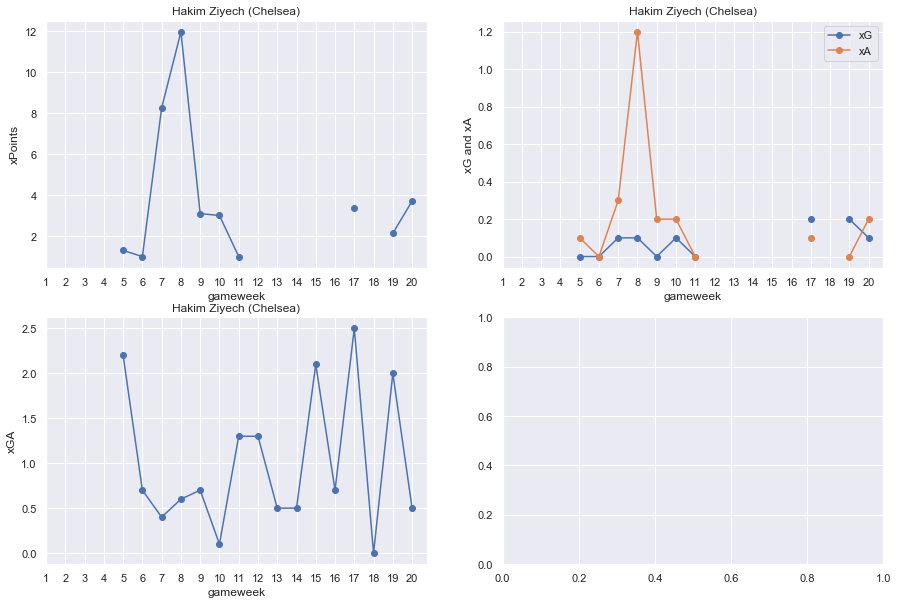

In [14]:
# find player index
name_string = 'Ziye'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
ix = playersFound.index[0]
#ix = 12

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [15]:
# find player index
df[df['web_name'].str.contains('Souc')]

,adjusted points,adjusted points per game,assists,assists_week1,assists_week10,assists_week11,assists_week12,assists_week13,assists_week14,assists_week15,assists_week16,assists_week17,assists_week18,assists_week19,assists_week2,assists_week20,assists_week3,assists_week4,assists_week5,assists_week6,assists_week7,assists_week8,assists_week9,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheet_points,clean_sheets,cleansheet_week1,cleansheet_week10,cleansheet_week11,cleansheet_week12,cleansheet_week13,cleansheet_week14,cleansheet_week15,cleansheet_week16,cleansheet_week17,cleansheet_week18,cleansheet_week19,cleansheet_week2,cleansheet_week20,cleansheet_week3,cleansheet_week4,cleansheet_week5,cleansheet_week6,cleansheet_week7,cleansheet_week8,cleansheet_week9,code,...,xGA_week3,xGA_week4,xGA_week5,xGA_week6,xGA_week7,xGA_week8,xGA_week9,xG_points,xG_week1,xG_week10,xG_week11,xG_week12,xG_week13,xG_week14,xG_week15,xG_week16,xG_week17,xG_week18,xG_week19,xG_week2,xG_week20,xG_week3,xG_week4,xG_week5,xG_week6,xG_week7,xG_week8,xG_week9,xPoints,xPoints week 1,xPoints week 10,xPoints week 11,xPoints week 12,xPoints week 13,xPoints week 14,xPoints week 15,xPoints week 16,xPoints week 17,xPoints week 18,xPoints week 19,xPoints week 2,xPoints week 20,xPoints week 3,xPoints week 4,xPoints week 5,xPoints week 6,xPoints week 7,xPoints week 8,xPoints week 9,yellow_cards
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
449,85.76322,4.288161,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13,323,NaN,NaN,6.364478,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,215439,...,0.7,0.3,1.2,1.1,1.8,1.7,0.6,26.0,0.4,0.1,0.9,0.1,0.0,0.2,0.6,0.1,0.7,NaN,0.0,0.1,0.6,0.5,-0.1,0.2,0.1,0.0,0.2,0.5,8.67032,4.901194,2.574274,7.635335,4.965299,2.332871,3.135335,8.301194,3.106531,9.704837,NaN,3.367879,3.001897,8.67032,6.393137,2.240818,2.301194,2.832871,2.165299,4.182684,5.048812,2


In [16]:
my_starting11 = [12,232,558,277,271,302,37,141,506,202,388]
my_subs = [213,449,200,146]

In [17]:
print('STARTING 11')
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,51,17.884615,5.2,4.347722,3.329433,4.972176,4.689629,4.384656,1.925204
232,Chilwell,Chelsea,61,17.000000,5.0,4.156116,3.068212,3.034368,5.003584,4.518375,1.682762
558,Coufal,West Ham,47,15.853659,4.1,4.148886,4.766865,4.217113,3.654963,4.051353,1.913738
277,Cancelo,Manchester City,59,15.087719,5.7,5.387487,5.785390,5.534422,6.063402,5.322396,2.217993
271,Gündogan,Manchester City,57,14.035088,5.7,4.775795,6.443247,6.139186,5.192337,4.683053,2.000360
302,Fernandes,Manchester Utd,114,20.000000,7.1,6.644332,5.849749,6.574855,5.984298,6.949990,1.967881
37,Grealish,Aston Villa,77,17.936508,6.3,5.555227,4.854964,5.084005,5.367823,5.295851,2.001965
141,Zaha,Crystal Palace,72,17.068966,5.8,4.854543,3.611676,4.069193,4.937239,4.992734,1.809182
506,Wilson,Newcastle Utd,66,17.962963,5.4,4.908640,2.733124,3.433907,4.654949,4.790501,1.910685



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
213,Meslier,Leeds United,47,17.804878,4.1,3.437096,3.604448,3.708983,3.240141,3.533201,1.585414
449,Soucek,West Ham,53,20.000000,4.8,4.288161,4.969914,5.121960,4.055279,4.252919,1.862658
200,Dallas,Leeds United,48,19.230769,3.9,2.976861,4.689662,3.457463,2.603740,3.007131,1.358745
146,Mitchell,Crystal Palace,39,11.034483,2.9,2.724867,3.511667,3.511667,3.211454,2.898345,1.379790


## Save data

In [18]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)